In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
df = pd.read_csv('../ML471_S3_Datafile_Practice.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

c:\Users\madha\PycharmProjects\NLP-ML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\madha\PycharmProjects\NLP-ML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\madha\PycharmProjects\NLP-ML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


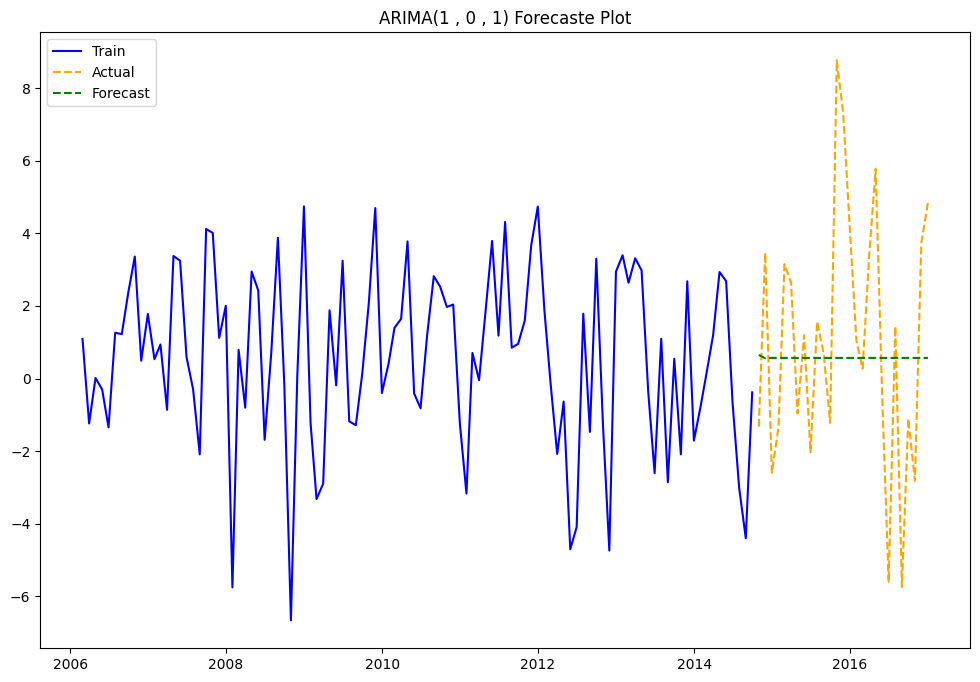

In [15]:
size = int(len(df) * 0.8)
train, test = df.Close_diff[:size], df.Close_diff[size:]

model = ARIMA(train, order=(1, 0, 1))
model_fit = model.fit()

forecast = model_fit.get_forecast(steps=len(test))
forecast_pre = forecast.predicted_mean

plt.figure(figsize=(12, 8))
plt.plot(train  , label='Train', color='blue')
plt.plot(test   , label='Actual', color='orange', linestyle='--')
plt.plot(forecast_pre, label='Forecast', color='green', linestyle='--')
plt.title("ARIMA(1 , 0 , 1) Forecaste Plot")
plt.legend(loc = "upper left")

Text(0, 0.5, 'Residuals')

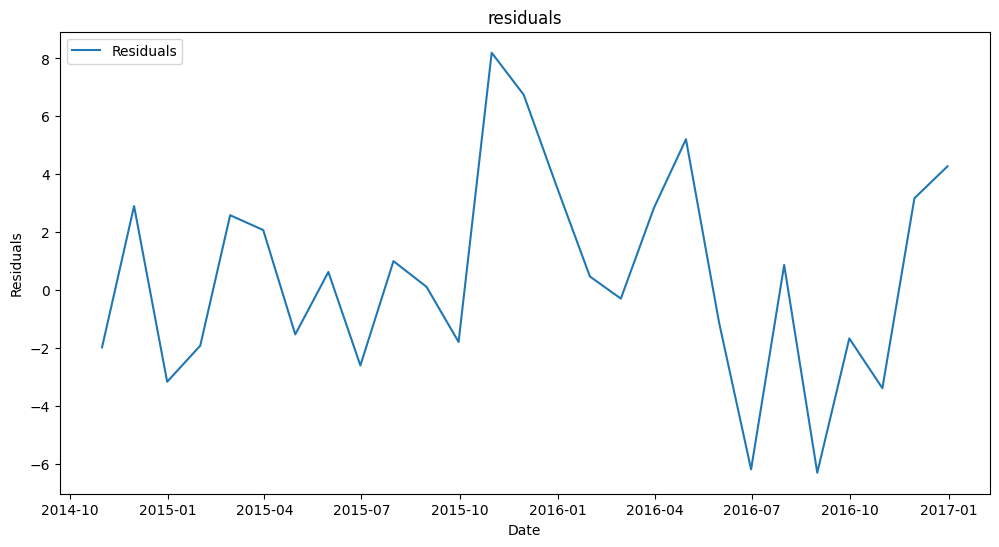

In [14]:
residuals = test - forecast_pre
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.legend(loc = "upper left")
plt.title("residuals")
plt.xlabel('Date')
plt.ylabel('Residuals')